<a href="https://colab.research.google.com/github/Arisarayangyoo/bcs_dpdm24/blob/main/chapter_5_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
import os
os.chdir('/content/drive/MyDrive/Data/Data_BSC')

!pwd # เช็ค path ที่กำลังทำงานอยู่
apndx_data = pd.read_csv("/content/drive/MyDrive/Data/Data_BSC/apndx.csv")

/content/drive/MyDrive/Data/Data_BSC


In [155]:
apndx_data.shape

(260000, 25)

In [156]:
apndx_data.head()

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,228,8.1,4.4,361,Negative,Mild,691,Surgery,6.5,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,186,9.7,6.2,235,Negative,Moderate,275,Chemotherapy,1.6,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,231,8.2,4.6,269,Negative,Moderate,668,Chemotherapy,0.7,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,NaN,...,151,6.8,6.0,193,Negative,Moderate,256,Radiation,2.1,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,236,6.7,4.9,396,Negative,Mild,370,Radiation,0.5,No


In [157]:
apndx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Patient_ID                      260000 non-null  object 
 1   Country                         260000 non-null  object 
 2   Age                             260000 non-null  int64  
 3   Gender                          260000 non-null  object 
 4   BMI                             260000 non-null  float64
 5   Smoking_Status                  260000 non-null  object 
 6   Alcohol_Consumption             260000 non-null  object 
 7   Family_History_Cancer           260000 non-null  object 
 8   Genetic_Mutations               260000 non-null  object 
 9   Chronic_Diseases                129913 non-null  object 
 10  Physical_Activity_Level         260000 non-null  object 
 11  Diet_Type                       260000 non-null  object 
 12  Radiation_Exposu

In [158]:
apndx_data['Chronic_Diseases']

,Chronic_Diseases
0,Diabetes
1,Diabetes
2,Diabetes
3,NaN
4,Hypertension
...,...
259995,Diabetes
259996,Hypertension
259997,NaN
259998,NaN


In [159]:
apndx_data['Chronic_Diseases'] = apndx_data['Chronic_Diseases'].fillna =('No')

In [160]:
apndx_data[apndx_data['Treatment_Type'].isnull()]

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
16,PID_000017,China,51,Male,16.7,No,Low,No,No,No,...,293,7.2,4.8,175,Negative,Mild,300,NaN,5.8,No
23,PID_000024,China,64,Female,31.3,No,High,No,No,No,...,166,9.2,4.9,320,Negative,Severe,417,NaN,1.9,No
31,PID_000032,India,83,Female,28.9,No,High,Yes,No,No,...,271,5.7,4.5,373,Negative,Severe,172,NaN,14.0,No
36,PID_000037,China,34,Male,25.6,No,High,No,No,No,...,202,7.1,5.2,161,Negative,Moderate,140,NaN,4.0,No
46,PID_000047,China,83,Male,21.1,No,Low,No,No,No,...,272,8.8,5.2,212,Negative,Mild,321,NaN,4.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259945,PID_259946,China,82,Female,30.0,No,Moderate,No,No,No,...,299,8.1,5.4,156,Negative,Moderate,360,NaN,1.9,Yes
259957,PID_259958,Spain,35,Female,32.2,No,Low,No,No,No,...,150,7.7,4.3,208,Negative,Mild,392,NaN,2.5,No
259974,PID_259975,USA,25,Female,32.0,No,Low,Yes,Yes,No,...,201,8.9,5.7,194,Negative,Mild,38,NaN,1.5,No
259982,PID_259983,India,84,Female,22.6,No,High,No,No,No,...,255,8.2,5.6,261,Positive,Moderate,326,NaN,1.6,No


In [161]:
apndx_data['Treatment_Type'] = apndx_data['Treatment_Type'].fillna =('No')

In [162]:
set(apndx_data['Symptom_Severity'])

{'Mild', 'Moderate', 'Severe'}

In [163]:
apndx_data.groupby(['Symptom_Severity','Appendix_Cancer_Prediction']).count()

Patient_ID  Country     Age  \
Symptom_Severity Appendix_Cancer_Prediction                                
Mild             No                              110229   110229  110229   
                 Yes                              19532    19532   19532   
Moderate         No                               77436    77436   77436   
                 Yes                              13761    13761   13761   
Severe           No                               33048    33048   33048   
                 Yes                               5994     5994    5994   

                                             Gender     BMI  Smoking_Status  \
Symptom_Severity Appendix_Cancer_Prediction                                   
Mild             No                          110229  110229          110229   
                 Yes                          19532   19532           19532   
Moderate         No                           77436   77436           77436   
                 Yes                          13761   13761           13761   
Severe           No                           33048   33048           33048   
                 Yes                           5994    5994            5994   

                                             Alcohol_Consumption  \
Symptom_Severity Appendix_Cancer_Prediction                        
Mild             No                                       110229   
                 Yes                                       19532   
Moderate         No                                        77436   
                 Yes                                       13761   
Severe           No                                        33048   
                 Yes                                        5994   

                                             Family_History_Cancer  \
Symptom_Severity Appendix_Cancer_Prediction                          
Mild             No                                         110229   
                 Yes                                         19532   
Moderate         No                                          77436   
                 Yes                                         13761   
Severe           No                                          33048   
                 Yes                                          5994   

                                             Genetic_Mutations  \
Symptom_Severity Appendix_Cancer_Prediction                      
Mild             No                                     110229   
                 Yes                                     19532   
Moderate         No                                      77436   
                 Yes                                     13761   
Severe           No                                      33048   
                 Yes                                      5994   

                                             Chronic_Diseases  ...  \
Symptom_Severity Appendix_Cancer_Prediction                    ...   
Mild             No                                    110229  ...   
                 Yes                                    19532  ...   
Moderate         No                                     77436  ...   
                 Yes                                    13761  ...   
Severe           No                                     33048  ...   
                 Yes                                     5994  ...   

                                             Previous_Cancers  Blood_Pressure  \
Symptom_Severity Appendix_Cancer_Prediction                                     
Mild             No                                    110229          110229   
                 Yes                                    19532           19532   
Moderate         No                                     77436           77436   
                 Yes                                    13761           13761   
Severe           No                                     33048           33048   
                 Yes                    

# สร้าง โมเดลทำนายว่าคนไข้ที่มามีโอกาสเป็น cancer มั้ย

## import data

### ลบข้อมูลที่ได้หลังจากตรวจเเล้วว่าเป็นมะเร็ง

In [164]:
apndx_data = apndx_data.drop(columns=['Diagnosis_Delay_Days', 'Treatment_Type', 'Survival_Years_After_Diagnosis'])

In [165]:
apndx_data.head()

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Radiation_Exposure,Previous_Cancers,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,No,...,No,No,156,228,8.1,4.4,361,Negative,Mild,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,No,...,No,No,117,186,9.7,6.2,235,Negative,Moderate,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,No,...,No,No,115,231,8.2,4.6,269,Negative,Moderate,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,No,...,No,Yes,149,151,6.8,6.0,193,Negative,Moderate,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,No,...,No,No,179,236,6.7,4.9,396,Negative,Mild,No


### ลบข้อมูลที่ไม่น่าจะใช้สร้างโมเดลได้

In [166]:
apndx_data = apndx_data.drop(columns=['Patient_ID','Country'])

In [167]:
apndx_data.shape

(260000, 20)

### แปลงข้อมูล ให้เป็นตัวเลขก่อน

In [168]:
#เรียงข้อมูลที่เรียงได้
Smoking_maping = {'Yes': 1, 'No': 0}
apndx_data['Smoking_Status'] = apndx_data['Smoking_Status'].map(Smoking_maping)

Alcohol_maping = {'Low': 0, 'Moderate': 1, 'High': 2}
apndx_data['Alcohol_Consumption'] = apndx_data['Alcohol_Consumption'].map(Alcohol_maping)

Family_maping = {'Yes': 1, 'No': 0}
apndx_data['Family_History_Cancer'] = apndx_data['Family_History_Cancer'].map(Family_maping)

Genetic_maping = {'Yes': 1, 'No': 0}
apndx_data['Genetic_Mutations'] = apndx_data['Genetic_Mutations'].map(Genetic_maping)

Physical_maping = {'Low': 0, 'Moderate': 1, 'High': 2}
apndx_data['Physical_Activity_Level'] = apndx_data['Physical_Activity_Level'].map(Physical_maping)

Radiation_Exposure_maping = {'Yes': 1, 'No': 0}
apndx_data['Radiation_Exposure'] = apndx_data['Radiation_Exposure'].map(Radiation_Exposure_maping)

Previous_maping = {'Yes': 1, 'No': 0}
apndx_data['Previous_Cancers'] = apndx_data['Previous_Cancers'].map(Previous_maping)

Tumores_maping = {'Negative': 0, 'Positive': 1}
apndx_data['Tumor_Markers'] = apndx_data['Tumor_Markers'].map(Tumores_maping)

Symptom_maping = {'Low': 0, 'Moderate': 1, 'High': 2}
apndx_data['Symptom_Severity'] = apndx_data['Symptom_Severity'].map(Symptom_maping)


In [169]:
# เรียงข้อมูลที่เรียงไม่ได้
# แทนตัวเลขให้กับค่าที่เรียงไม่ได้
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the specified columns
enc.fit(apndx_data[['Chronic_Diseases', 'Gender', 'Diet_Type']])

# Transform the data
encoded_data = enc.transform(apndx_data[['Chronic_Diseases', 'Gender', 'Diet_Type']]).toarray()

# Create a new DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(['Chronic_Diseases', 'Gender', 'Diet_Type']))

# Concatenate the encoded DataFrame with the original DataFrame
apndx_data = pd.concat([apndx_data, encoded_df], axis=1)

# Drop the original columns
apndx_data = apndx_data.drop(['Chronic_Diseases', 'Gender', 'Diet_Type'], axis=1)

# Display the updated DataFrame
apndx_data.head()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Tumor_Markers,Symptom_Severity,Appendix_Cancer_Prediction,Chronic_Diseases_No,Gender_Female,Gender_Male,Gender_Other,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
0,67,28.6,0,0,1,0,2,0,0,156,...,0,NaN,Yes,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,83,19.4,0,0,0,0,0,0,0,117,...,0,1.0,No,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,52,17.2,0,0,1,0,0,0,0,115,...,0,1.0,No,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,71,31.8,1,0,0,0,2,0,1,149,...,0,1.0,No,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,19,17.7,0,0,0,0,1,0,0,179,...,0,NaN,No,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [170]:
Previous_maping = {'No': 0, 'Yes': 1}
apndx_data['Appendix_Cancer_Prediction'] = apndx_data['Appendix_Cancer_Prediction'].map(Previous_maping)

## เก็บ Test เอาไว้วัดผลตอนจบ
- เช็คว่า train test กระจายตัวเท่ากันมั้ย

In [171]:
# prompt: random sampling 60000 data and also keep the rest
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(apndx_data, train_size=200000, random_state=6)

print("Trainnig data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)


Trainnig data shape: (200000, 24)
Testing data shape: (60000, 24)


In [172]:
test_data.groupby(['Appendix_Cancer_Prediction']).count()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Platelet_Count,Tumor_Markers,Symptom_Severity,Chronic_Diseases_No,Gender_Female,Gender_Male,Gender_Other,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
Appendix_Cancer_Prediction,,,,,,,,,,,,,,,,,,,,,
0,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927,...,50927,50927,17704,50927,50927,50927,50927,50927,50927,50927
1,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073,...,9073,9073,3149,9073,9073,9073,9073,9073,9073,9073


In [173]:
9073/	50927

0.17815696978027373

In [174]:
train_data.groupby(['Appendix_Cancer_Prediction']).count()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Platelet_Count,Tumor_Markers,Symptom_Severity,Chronic_Diseases_No,Gender_Female,Gender_Male,Gender_Other,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
Appendix_Cancer_Prediction,,,,,,,,,,,,,,,,,,,,,
0,169786,169786,169786,169786,169786,169786,169786,169786,169786,169786,...,169786,169786,59732,169786,169786,169786,169786,169786,169786,169786
1,30214,30214,30214,30214,30214,30214,30214,30214,30214,30214,...,30214,30214,10612,30214,30214,30214,30214,30214,30214,30214


In [175]:
30214/169786

0.17795342372162604

## เลือก model ที่ดีที่สุด (Model Selection)



1.   Decision Tree
2.   Decision Tree (short)
3.   Naviive Bayes


### Decision Tree

In [176]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits = 10, shuffle= True ,random_state=6)


In [177]:
X_train = train_data.drop('Appendix_Cancer_Prediction', axis=1)
y_train = train_data['Appendix_Cancer_Prediction']

In [178]:
# import
from sklearn.tree import DecisionTreeClassifier
# define
dt_classifier = DecisionTreeClassifier() #default
# train & evolulation (cross validation)
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=kf, scoring='accuracy')

In [181]:
# Print cross-validation results
print ("Cross-validation scores:", cv_scores)
print ("Mean accuracy:", cv_scores.mean())
print ("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.72305 0.7257  0.72465 0.72465 0.72515 0.7233  0.7232  0.7207  0.72745
 0.72325]
Mean accuracy: 0.72411
Standard deviation: 0.0017413787640832294


### Decision Tree (short)


In [182]:
# import
from sklearn.tree import DecisionTreeClassifier
# define
dt_classifier2 = DecisionTreeClassifier(max_depth=5) #default
# train & evolulation (cross validation)
cv_scores = cross_val_score(dt_classifier2, X_train, y_train, cv=kf, scoring='accuracy')

In [183]:
# Print cross-validation results
print ("Cross-validation scores:", cv_scores)
print ("Mean accuracy:", cv_scores.mean())
print ("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.8491  0.84865 0.84905 0.84875 0.84905 0.8506  0.84955 0.8494  0.8453
 0.8493 ]
Mean accuracy: 0.8488749999999999
Standard deviation: 0.0012979310459342514


### Naviive Bayes

In [ ]:
#import
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
#define
nb_classifier = GaussianNB()
#cross
cv_scores = cross_val_score(nb_classifier, X_train, y_train, cv=kf, scoring='accuracy')

In [ ]:
# Print cross-validation results
print ("Cross-validation scores:", cv_scores)
print ("Mean accuracy:", cv_scores.mean())
print ("Standard deviation:", cv_scores.std())

## เลือก model ที่แม่นที่สุด คือ short tree มา train ด้วย  ALL Training data

In [186]:
from sklearn.tree import DecisionTreeClassifier
# define
dt_classifier2 = DecisionTreeClassifier(max_depth=5) #default
# train & evolulation (cross validation)
dt_classifier2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

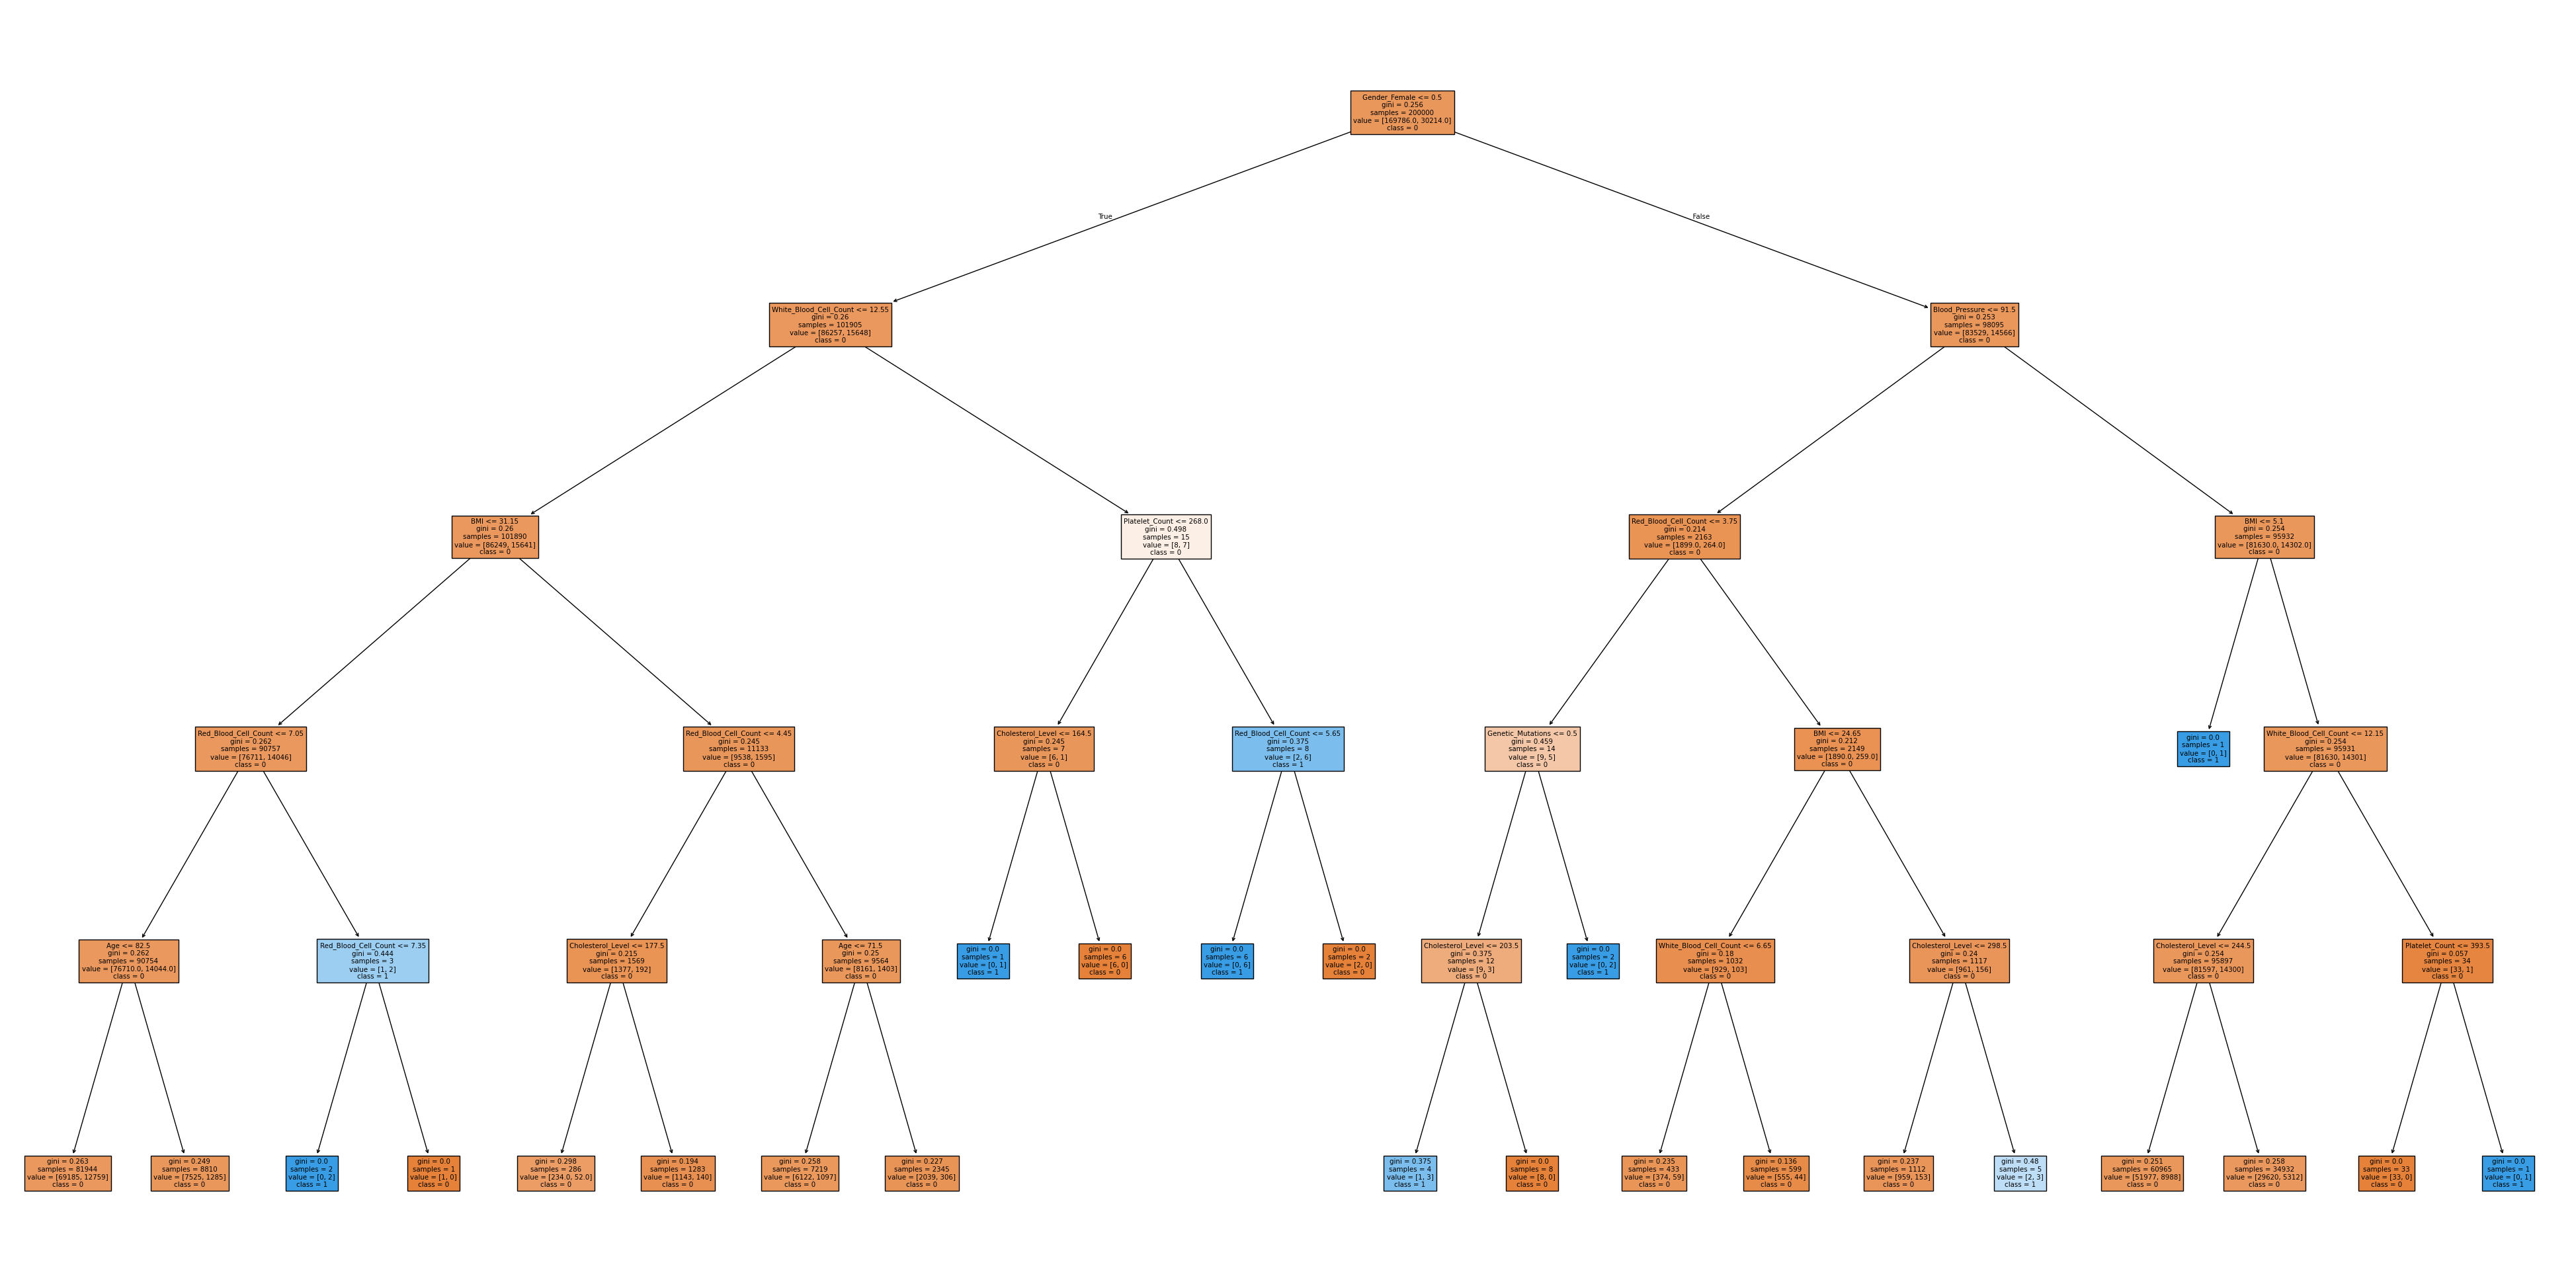

In [190]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming dt_classifier2 is your trained DecisionTreeClassifier
plt.figure(figsize=(50,25))
plot_tree(dt_classifier2, filled=True, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

## วัดผลด้วย test data

In [202]:
X_test = test_data.drop('Appendix_Cancer_Prediction', axis = 1)
y_actual = test_data['Appendix_Cancer_Prediction']

In [203]:
# predict
y_pred = dt_classifier2.predict(X_test)

In [204]:
# evaluation
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_actual, y_pred)
print(f"Accuracy on test data : {accuracy}")

Accuracy on test data : 0.8487


# Quiz12 หาต้นไม้ตัดสินใจที่มี average cross--validation accuracy มากกว่า 84.887 %


In [265]:
kf = KFold(n_splits = 4, shuffle= True ,random_state=1)

X_train = train_data.drop('Appendix_Cancer_Prediction', axis=1)
y_train = train_data['Appendix_Cancer_Prediction']

In [277]:
# import
from sklearn.tree import DecisionTreeClassifier
# define
dt_classifier2 = DecisionTreeClassifier(max_depth=3) #default
# train & evolulation (cross validation)
cv_scores = cross_val_score(dt_classifier2, X_train, y_train, cv=kf, scoring='accuracy')

In [278]:
# Print cross-validation results
print ("Cross-validation scores:", cv_scores)
print ("average cross-validation accuracy:", cv_scores.mean())
print ("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.85146 0.84974 0.84616 0.84834]
average cross-validation accuracy: 0.848925
Standard deviation: 0.0019415135848095389
